In [1]:
import pandas as pd
import numpy as np   #importing important libraries
import warnings
warnings.filterwarnings('ignore')

In [2]:
df1=pd.read_csv("../data/FINAL_MERGED_DATA1.csv", encoding="ISO-8859-1") #reading the csv file containg the merged data

In [3]:
df1.head()

,college_institution,state,city,website,construct_in_sqmt,year_of_establishment,type,autonomous,has_diploma_courses,management,...,common_room,computer_center,cafeteria,guest_house,is_accredited,has_score,accreditation_body,max_score,score,Offers_Scholarships
0,SHRI D.V.RAVAL ARTS & COMM. COLLEGE-HALVAD,Gujarat,HALVAD,--,600.00,1986.0,Affiliated College,False,False,Private Aided,...,TRUE,TRUE,FALSE,FALSE,TRUE,TRUE,NAAC,4,2.18,NaN
1,Mahamandleshwar Shri Krishnanandji College of ...,Gujarat,BHARUCH 392001,www.mkccollege.ac.in,3098.04,1967.0,Affiliated College,False,False,Private Aided,...,TRUE,TRUE,TRUE,FALSE,TRUE,TRUE,NAAC,4,2.74,NaN
2,"D536 SRI K VIRUPAKSHAPPA DEGREE COLLEGE, TURVI...",Karnataka,SINDHANUR,NaN,678.63,2013.0,Affiliated College,False,False,Private Un-Aided,...,NaN,NaN,NaN,NaN,FALSE,NaN,NaN,NaN,NaN,NaN
3,"JASHODABA POLYTECHNIC INSTITUTE , SIDHPUR 952",Gujarat,SIDHPUR,www.jashodabapolytechnic.com,5993.39,2012.0,Affiliated College,False,True,Private Un-Aided,...,TRUE,TRUE,TRUE,TRUE,FALSE,NaN,NaN,NaN,NaN,NaN
4,"GOVINDLAL KANHAIYALAL JOSHI (NIGHT) COLLEGE, L...",Maharashtra,latur,gkjoshinightcommercecollegelatu.org,21000.00,2012.0,Affiliated College,False,False,Private Un-Aided,...,TRUE,TRUE,TRUE,FALSE,FALSE,NaN,NaN,NaN,NaN,NaN


In [4]:
df1.isnull().sum()  #calculating total number of null values in each column

college_institution              0
state                            0
city                          1585
website                       8062
construct_in_sqmt             4273
year_of_establishment          475
type                             0
autonomous                       0
has_diploma_courses              0
management                       0
specialized                      0
speciality                   23641
other_speciality             34371
girl_exclusive                   0
staff_quarter_available          0
student_hostel_available         0
programme                      936
discipline                     948
discipline_group_category      936
intake                         936
admission_criterion           6974
Total Faculties                  0
Total Students                   0
playground                    7010
auditorium                    7010
theatre                       7010
library                       7010
laboratory                    7010
conference_hall     

In [5]:
# dropping columns having high number of null values
df2 = df1.drop(['speciality','other_speciality','has_score','accreditation_body','max_score','score','Offers_Scholarships'],axis='columns')
df2.shape

(35213, 35)

In [6]:
df2.isnull().sum()

college_institution             0
state                           0
city                         1585
website                      8062
construct_in_sqmt            4273
year_of_establishment         475
type                            0
autonomous                      0
has_diploma_courses             0
management                      0
specialized                     0
girl_exclusive                  0
staff_quarter_available         0
student_hostel_available        0
programme                     936
discipline                    948
discipline_group_category     936
intake                        936
admission_criterion          6974
Total Faculties                 0
Total Students                  0
playground                   7010
auditorium                   7010
theatre                      7010
library                      7010
laboratory                   7010
conference_hall              7010
health_center                7010
gymnasium_fitness_center     7010
indoor_stadium

In [7]:
df3=df2.dropna(subset=['playground']) # dropping rows where playground values are null as those values are just 7010 and total rows are around 350000 so we can drop 7000 rows
df3.shape

(28203, 35)

In [8]:
df3.isnull().sum()

college_institution             0
state                           0
city                         1215
website                      5896
construct_in_sqmt            3133
year_of_establishment         317
type                            0
autonomous                      0
has_diploma_courses             0
management                      0
specialized                     0
girl_exclusive                  0
staff_quarter_available         0
student_hostel_available        0
programme                     875
discipline                    883
discipline_group_category     875
intake                        875
admission_criterion          6608
Total Faculties                 0
Total Students                  0
playground                      0
auditorium                      0
theatre                         0
library                         0
laboratory                      0
conference_hall                 0
health_center                   0
gymnasium_fitness_center        0
indoor_stadium

In [9]:
df3.median(axis=0,skipna=True) # calculating the median values for each column

construct_in_sqmt           3638.895
year_of_establishment       2005.000
autonomous                     0.000
has_diploma_courses            0.000
specialized                    0.000
girl_exclusive                 0.000
staff_quarter_available        0.000
student_hostel_available       0.000
dtype: float64

In [10]:
df3.mean(axis=0,skipna=True) # calculating the mean values for each column

construct_in_sqmt           21482.958739
year_of_establishment        1997.006168
autonomous                      0.111584
has_diploma_courses             0.018721
specialized                     0.333546
girl_exclusive                  0.105060
staff_quarter_available         0.232351
student_hostel_available        0.403574
dtype: float64

In [11]:
df3["construct_in_sqmt"].fillna("3638.895",inplace=True) # filling median values instead of mean inplace of na values in column construct_in_sqmt as mean values is very high so taking median is better according to domain knowledge

In [12]:
df3.isnull().sum()

college_institution             0
state                           0
city                         1215
website                      5896
construct_in_sqmt               0
year_of_establishment         317
type                            0
autonomous                      0
has_diploma_courses             0
management                      0
specialized                     0
girl_exclusive                  0
staff_quarter_available         0
student_hostel_available        0
programme                     875
discipline                    883
discipline_group_category     875
intake                        875
admission_criterion          6608
Total Faculties                 0
Total Students                  0
playground                      0
auditorium                      0
theatre                         0
library                         0
laboratory                      0
conference_hall                 0
health_center                   0
gymnasium_fitness_center        0
indoor_stadium

In [13]:
df3.median(axis=0,skipna=True)

year_of_establishment       2005.0
autonomous                     0.0
has_diploma_courses            0.0
specialized                    0.0
girl_exclusive                 0.0
staff_quarter_available        0.0
student_hostel_available       0.0
dtype: float64

In [14]:
df3["year_of_establishment"].fillna("2005",inplace=True) # filling median values inplace of na values in column year_of_establishment

In [15]:
df3.isnull().sum()

college_institution             0
state                           0
city                         1215
website                      5896
construct_in_sqmt               0
year_of_establishment           0
type                            0
autonomous                      0
has_diploma_courses             0
management                      0
specialized                     0
girl_exclusive                  0
staff_quarter_available         0
student_hostel_available        0
programme                     875
discipline                    883
discipline_group_category     875
intake                        875
admission_criterion          6608
Total Faculties                 0
Total Students                  0
playground                      0
auditorium                      0
theatre                         0
library                         0
laboratory                      0
conference_hall                 0
health_center                   0
gymnasium_fitness_center        0
indoor_stadium

In [16]:
df3.shape # calculating number of rows and columns

(28203, 35)

In [17]:
df4=df3.dropna(subset=['city'])  # drop rows having city as null as those are just around 2000 which is very less compared to total values
df4.shape

(26988, 35)

In [18]:
df4.isnull().sum()

college_institution             0
state                           0
city                            0
website                      5200
construct_in_sqmt               0
year_of_establishment           0
type                            0
autonomous                      0
has_diploma_courses             0
management                      0
specialized                     0
girl_exclusive                  0
staff_quarter_available         0
student_hostel_available        0
programme                     856
discipline                    863
discipline_group_category     856
intake                        856
admission_criterion          6416
Total Faculties                 0
Total Students                  0
playground                      0
auditorium                      0
theatre                         0
library                         0
laboratory                      0
conference_hall                 0
health_center                   0
gymnasium_fitness_center        0
indoor_stadium

In [19]:
df4['admission_criterion'].unique() # finding unique values in the column admission_criterion

array(['University level Examination', nan, 'Direct Admission',
       'State level Examination', 'All India level Examination', '#NAME?'],
      dtype=object)

In [20]:
df4["admission_criterion"].fillna("Direct Admission",inplace=True) # filling na values in the column admission_criterion by Direct Admission according to domain knowledge

In [21]:
df4.isnull().sum()

college_institution             0
state                           0
city                            0
website                      5200
construct_in_sqmt               0
year_of_establishment           0
type                            0
autonomous                      0
has_diploma_courses             0
management                      0
specialized                     0
girl_exclusive                  0
staff_quarter_available         0
student_hostel_available        0
programme                     856
discipline                    863
discipline_group_category     856
intake                        856
admission_criterion             0
Total Faculties                 0
Total Students                  0
playground                      0
auditorium                      0
theatre                         0
library                         0
laboratory                      0
conference_hall                 0
health_center                   0
gymnasium_fitness_center        0
indoor_stadium

In [22]:
df4.admission_criterion.replace({"#NAME?":"Direct Admission"}) # replacing #NAME? values in the column admission_criterion by Direct Admission according to domain knowledge

0        University level Examination
1        University level Examination
3                    Direct Admission
4                    Direct Admission
5                    Direct Admission
                     ...             
35206    University level Examination
35207                Direct Admission
35209                Direct Admission
35210                Direct Admission
35211    University level Examination
Name: admission_criterion, Length: 26988, dtype: object

In [23]:
df4['admission_criterion'].unique()

array(['University level Examination', 'Direct Admission',
       'State level Examination', 'All India level Examination', '#NAME?'],
      dtype=object)

In [24]:
df4['admission_criterion'].value_counts()

Direct Admission                14054
University level Examination     6868
State level Examination          4466
All India level Examination      1599
#NAME?                              1
Name: admission_criterion, dtype: int64

In [25]:
df4.head()

,college_institution,state,city,website,construct_in_sqmt,year_of_establishment,type,autonomous,has_diploma_courses,management,...,laboratory,conference_hall,health_center,gymnasium_fitness_center,indoor_stadium,common_room,computer_center,cafeteria,guest_house,is_accredited
0,SHRI D.V.RAVAL ARTS & COMM. COLLEGE-HALVAD,Gujarat,HALVAD,--,600,1986,Affiliated College,False,False,Private Aided,...,FALSE,FALSE,FALSE,FALSE,FALSE,TRUE,TRUE,FALSE,FALSE,TRUE
1,Mahamandleshwar Shri Krishnanandji College of ...,Gujarat,BHARUCH 392001,www.mkccollege.ac.in,3098.04,1967,Affiliated College,False,False,Private Aided,...,FALSE,TRUE,FALSE,TRUE,FALSE,TRUE,TRUE,TRUE,FALSE,TRUE
3,"JASHODABA POLYTECHNIC INSTITUTE , SIDHPUR 952",Gujarat,SIDHPUR,www.jashodabapolytechnic.com,5993.39,2012,Affiliated College,False,True,Private Un-Aided,...,TRUE,TRUE,TRUE,TRUE,TRUE,TRUE,TRUE,TRUE,TRUE,FALSE
4,"GOVINDLAL KANHAIYALAL JOSHI (NIGHT) COLLEGE, L...",Maharashtra,latur,gkjoshinightcommercecollegelatu.org,21000,2012,Affiliated College,False,False,Private Un-Aided,...,FALSE,TRUE,TRUE,TRUE,TRUE,TRUE,TRUE,TRUE,FALSE,FALSE
5,MERCHANT COLLEGE OF MANAGEMENT & RESEARCH,Gujarat,VISNAGAR,WWW.DALIYAGROUP.AC.IN,3475,2000,Affiliated College,False,False,Private Un-Aided,...,FALSE,TRUE,FALSE,FALSE,FALSE,TRUE,TRUE,FALSE,FALSE,FALSE


In [26]:
print(df4['admission_criterion'])

0        University level Examination
1        University level Examination
3                    Direct Admission
4                    Direct Admission
5                    Direct Admission
                     ...             
35206    University level Examination
35207                Direct Admission
35209                Direct Admission
35210                Direct Admission
35211    University level Examination
Name: admission_criterion, Length: 26988, dtype: object


In [27]:
df4.reset_index() # reseting the indexing because after dropping the rows the indexing gets tempered 

,index,college_institution,state,city,website,construct_in_sqmt,year_of_establishment,type,autonomous,has_diploma_courses,...,laboratory,conference_hall,health_center,gymnasium_fitness_center,indoor_stadium,common_room,computer_center,cafeteria,guest_house,is_accredited
0,0,SHRI D.V.RAVAL ARTS & COMM. COLLEGE-HALVAD,Gujarat,HALVAD,--,600,1986,Affiliated College,False,False,...,FALSE,FALSE,FALSE,FALSE,FALSE,TRUE,TRUE,FALSE,FALSE,TRUE
1,1,Mahamandleshwar Shri Krishnanandji College of ...,Gujarat,BHARUCH 392001,www.mkccollege.ac.in,3098.04,1967,Affiliated College,False,False,...,FALSE,TRUE,FALSE,TRUE,FALSE,TRUE,TRUE,TRUE,FALSE,TRUE
2,3,"JASHODABA POLYTECHNIC INSTITUTE , SIDHPUR 952",Gujarat,SIDHPUR,www.jashodabapolytechnic.com,5993.39,2012,Affiliated College,False,True,...,TRUE,TRUE,TRUE,TRUE,TRUE,TRUE,TRUE,TRUE,TRUE,FALSE
3,4,"GOVINDLAL KANHAIYALAL JOSHI (NIGHT) COLLEGE, L...",Maharashtra,latur,gkjoshinightcommercecollegelatu.org,21000,2012,Affiliated College,False,False,...,FALSE,TRUE,TRUE,TRUE,TRUE,TRUE,TRUE,TRUE,FALSE,FALSE
4,5,MERCHANT COLLEGE OF MANAGEMENT & RESEARCH,Gujarat,VISNAGAR,WWW.DALIYAGROUP.AC.IN,3475,2000,Affiliated College,False,False,...,FALSE,TRUE,FALSE,FALSE,FALSE,TRUE,TRUE,FALSE,FALSE,FALSE
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
26983,35206,"College of Engineering, Pune",Maharashtra,Pune,www.bvucoepune.edu.in,32672,1983,Constituent / University College,False,False,...,True,True,True,True,True,True,True,True,True,True
26984,35207,"KHILESH MAHAVIDAYALAYA SALEKASA, SLEKASA",Maharashtra,Salekasa,NaN,3000,2013,Affiliated College,False,False,...,True,True,True,True,True,True,True,True,True,False
26985,35209,"Sri Veerabhadreshwara College of Education, Th...",Karnataka,Shiralakoppa,WWW.svie.org,35724,2007,Affiliated College,False,False,...,True,True,True,False,True,True,True,True,True,False
26986,35210,"SHRI VARSHNEY COLLEGE,ALIGARH",Uttar Pradesh,Aligarh,www.shrivarshneyacollegealigarh.com,8500,1947,Affiliated College,False,False,...,True,True,True,True,False,True,True,True,True,True


In [28]:
print(df4['admission_criterion'])

0        University level Examination
1        University level Examination
3                    Direct Admission
4                    Direct Admission
5                    Direct Admission
                     ...             
35206    University level Examination
35207                Direct Admission
35209                Direct Admission
35210                Direct Admission
35211    University level Examination
Name: admission_criterion, Length: 26988, dtype: object


In [29]:
for i in df4['admission_criterion']:  # replacing #NAME? values in the column admission_criterion by Direct Admission according to domain knowledge
    if i=="#NAME?":
        i="Direct Admission"

In [30]:
df4['admission_criterion'].value_counts()

Direct Admission                14054
University level Examination     6868
State level Examination          4466
All India level Examination      1599
#NAME?                              1
Name: admission_criterion, dtype: int64

In [31]:
df4.isnull().sum()

college_institution             0
state                           0
city                            0
website                      5200
construct_in_sqmt               0
year_of_establishment           0
type                            0
autonomous                      0
has_diploma_courses             0
management                      0
specialized                     0
girl_exclusive                  0
staff_quarter_available         0
student_hostel_available        0
programme                     856
discipline                    863
discipline_group_category     856
intake                        856
admission_criterion             0
Total Faculties                 0
Total Students                  0
playground                      0
auditorium                      0
theatre                         0
library                         0
laboratory                      0
conference_hall                 0
health_center                   0
gymnasium_fitness_center        0
indoor_stadium

In [32]:
df4=df4.dropna(subset=['discipline']) # dropping rows containing na values in discipline
df4.shape

(26125, 35)

In [33]:
df4.isnull().sum()

college_institution             0
state                           0
city                            0
website                      5087
construct_in_sqmt               0
year_of_establishment           0
type                            0
autonomous                      0
has_diploma_courses             0
management                      0
specialized                     0
girl_exclusive                  0
staff_quarter_available         0
student_hostel_available        0
programme                       0
discipline                      0
discipline_group_category       0
intake                          0
admission_criterion             0
Total Faculties                 0
Total Students                  0
playground                      0
auditorium                      0
theatre                         0
library                         0
laboratory                      0
conference_hall                 0
health_center                   0
gymnasium_fitness_center        0
indoor_stadium

In [34]:
df4=df4.reset_index() # resetting the indexing

In [35]:
df4.head()

,index,college_institution,state,city,website,construct_in_sqmt,year_of_establishment,type,autonomous,has_diploma_courses,...,laboratory,conference_hall,health_center,gymnasium_fitness_center,indoor_stadium,common_room,computer_center,cafeteria,guest_house,is_accredited
0,0,SHRI D.V.RAVAL ARTS & COMM. COLLEGE-HALVAD,Gujarat,HALVAD,--,600,1986,Affiliated College,False,False,...,FALSE,FALSE,FALSE,FALSE,FALSE,TRUE,TRUE,FALSE,FALSE,TRUE
1,1,Mahamandleshwar Shri Krishnanandji College of ...,Gujarat,BHARUCH 392001,www.mkccollege.ac.in,3098.04,1967,Affiliated College,False,False,...,FALSE,TRUE,FALSE,TRUE,FALSE,TRUE,TRUE,TRUE,FALSE,TRUE
2,4,"GOVINDLAL KANHAIYALAL JOSHI (NIGHT) COLLEGE, L...",Maharashtra,latur,gkjoshinightcommercecollegelatu.org,21000,2012,Affiliated College,False,False,...,FALSE,TRUE,TRUE,TRUE,TRUE,TRUE,TRUE,TRUE,FALSE,FALSE
3,5,MERCHANT COLLEGE OF MANAGEMENT & RESEARCH,Gujarat,VISNAGAR,WWW.DALIYAGROUP.AC.IN,3475,2000,Affiliated College,False,False,...,FALSE,TRUE,FALSE,FALSE,FALSE,TRUE,TRUE,FALSE,FALSE,FALSE
4,6,"GOVERNMENT ARTS AND COMMERCE COLLEGE, RAPAR",Gujarat,RAPAR,NaN,3,2011,Affiliated College,False,False,...,FALSE,FALSE,FALSE,FALSE,FALSE,TRUE,FALSE,FALSE,FALSE,FALSE


In [36]:
del df4["index"]  # deleting the old column index having tempered indexing


In [37]:
websites=df4["website"]
print(websites)

0                                         --
1                       www.mkccollege.ac.in
2        gkjoshinightcommercecollegelatu.org
3                      WWW.DALIYAGROUP.AC.IN
4                                        NaN
                        ...                 
26120                  www.bvucoepune.edu.in
26121                                    NaN
26122                           WWW.svie.org
26123    www.shrivarshneyacollegealigarh.com
26124                      http://nimt.ac.in
Name: website, Length: 26125, dtype: object


In [38]:
df4["construct_in_sqmt"].median()

3638.895

In [39]:
x=df4["construct_in_sqmt"].median()
for i in range(0,26125):    # filling median values in the cells having constuct_in_sqmt less than 100 as it is noise data
    if(float(df4["construct_in_sqmt"][i])<100):
        df4["construct_in_sqmt"][i]=x
    if(float(df4["construct_in_sqmt"][i])>=50585705):   # filling median values in the cells having constuct_in_sqmt greater then biggest university in India 
        df4["construct_in_sqmt"][i]=x
df4.head()

,college_institution,state,city,website,construct_in_sqmt,year_of_establishment,type,autonomous,has_diploma_courses,management,...,laboratory,conference_hall,health_center,gymnasium_fitness_center,indoor_stadium,common_room,computer_center,cafeteria,guest_house,is_accredited
0,SHRI D.V.RAVAL ARTS & COMM. COLLEGE-HALVAD,Gujarat,HALVAD,--,600,1986,Affiliated College,False,False,Private Aided,...,FALSE,FALSE,FALSE,FALSE,FALSE,TRUE,TRUE,FALSE,FALSE,TRUE
1,Mahamandleshwar Shri Krishnanandji College of ...,Gujarat,BHARUCH 392001,www.mkccollege.ac.in,3098.04,1967,Affiliated College,False,False,Private Aided,...,FALSE,TRUE,FALSE,TRUE,FALSE,TRUE,TRUE,TRUE,FALSE,TRUE
2,"GOVINDLAL KANHAIYALAL JOSHI (NIGHT) COLLEGE, L...",Maharashtra,latur,gkjoshinightcommercecollegelatu.org,21000,2012,Affiliated College,False,False,Private Un-Aided,...,FALSE,TRUE,TRUE,TRUE,TRUE,TRUE,TRUE,TRUE,FALSE,FALSE
3,MERCHANT COLLEGE OF MANAGEMENT & RESEARCH,Gujarat,VISNAGAR,WWW.DALIYAGROUP.AC.IN,3475,2000,Affiliated College,False,False,Private Un-Aided,...,FALSE,TRUE,FALSE,FALSE,FALSE,TRUE,TRUE,FALSE,FALSE,FALSE
4,"GOVERNMENT ARTS AND COMMERCE COLLEGE, RAPAR",Gujarat,RAPAR,NaN,3638.89,2011,Affiliated College,False,False,State Government,...,FALSE,FALSE,FALSE,FALSE,FALSE,TRUE,FALSE,FALSE,FALSE,FALSE


In [40]:
df4.isnull().sum()

college_institution             0
state                           0
city                            0
website                      5087
construct_in_sqmt               0
year_of_establishment           0
type                            0
autonomous                      0
has_diploma_courses             0
management                      0
specialized                     0
girl_exclusive                  0
staff_quarter_available         0
student_hostel_available        0
programme                       0
discipline                      0
discipline_group_category       0
intake                          0
admission_criterion             0
Total Faculties                 0
Total Students                  0
playground                      0
auditorium                      0
theatre                         0
library                         0
laboratory                      0
conference_hall                 0
health_center                   0
gymnasium_fitness_center        0
indoor_stadium

In [41]:
area=0
for i in range(len(df4)):
    if(df4["state"][i]=='Karnataka'):
        area+=float(df4['construct_in_sqmt'][i])
print(area)        

107024790.02380496


In [42]:
for i in range(0,26125):      # replacing #NAME? and 0 values in Total Faculties and Total Students by median
    if(df4["Total Students"][i]=='#NAME?'):
        df4["Total Students"][i]='0'
    
    if(df4["Total Faculties"][i]=='#NAME?'):
        df4["Total Faculties"][i]='0'
    
x=df4["Total Students"].median()
y=df4["Total Faculties"].median()
for i in range(0,26125):
    if(float(df4["Total Students"][i])==0):
        df4["Total Students"][i]=x
    if(float(df4["Total Faculties"][i])==0):
        df4["Total Faculties"][i]=y

In [43]:
x=df4["construct_in_sqmt"].median()

In [44]:
min_col={}
max_col={}

In [45]:
# normalising the values in construct_in_sqmt between 0 and 1 by using the formula (currentValue-minValue)/(maxValue-minValue)
mx=-100000000000000
mn=100000000000000
for i in df4["construct_in_sqmt"]:
    if(float(i)<mn):
        mn=float(i)
    if(float(i)>mx):
        mx=float(i)

min_col['construct_in_sqmt']=mn
max_col['construct_in_sqmt']=mx
        
for i in range(0,26125):
   # print(i,end=" ")
    temp=float(df4["construct_in_sqmt"][i])-mn
    temp=temp/(mx-mn)
   # print(temp,end=" ")
    df4["construct_in_sqmt"][i]=temp
   # print(df4["construct_in_sqmt"][i])

df4.head()

,college_institution,state,city,website,construct_in_sqmt,year_of_establishment,type,autonomous,has_diploma_courses,management,...,laboratory,conference_hall,health_center,gymnasium_fitness_center,indoor_stadium,common_room,computer_center,cafeteria,guest_house,is_accredited
0,SHRI D.V.RAVAL ARTS & COMM. COLLEGE-HALVAD,Gujarat,HALVAD,--,5.00005e-05,1986,Affiliated College,False,False,Private Aided,...,FALSE,FALSE,FALSE,FALSE,FALSE,TRUE,TRUE,FALSE,FALSE,TRUE
1,Mahamandleshwar Shri Krishnanandji College of ...,Gujarat,BHARUCH 392001,www.mkccollege.ac.in,0.000299807,1967,Affiliated College,False,False,Private Aided,...,FALSE,TRUE,FALSE,TRUE,FALSE,TRUE,TRUE,TRUE,FALSE,TRUE
2,"GOVINDLAL KANHAIYALAL JOSHI (NIGHT) COLLEGE, L...",Maharashtra,latur,gkjoshinightcommercecollegelatu.org,0.00209002,2012,Affiliated College,False,False,Private Un-Aided,...,FALSE,TRUE,TRUE,TRUE,TRUE,TRUE,TRUE,TRUE,FALSE,FALSE
3,MERCHANT COLLEGE OF MANAGEMENT & RESEARCH,Gujarat,VISNAGAR,WWW.DALIYAGROUP.AC.IN,0.000337503,2000,Affiliated College,False,False,Private Un-Aided,...,FALSE,TRUE,FALSE,FALSE,FALSE,TRUE,TRUE,FALSE,FALSE,FALSE
4,"GOVERNMENT ARTS AND COMMERCE COLLEGE, RAPAR",Gujarat,RAPAR,NaN,0.000353893,2011,Affiliated College,False,False,State Government,...,FALSE,FALSE,FALSE,FALSE,FALSE,TRUE,FALSE,FALSE,FALSE,FALSE


In [46]:
df4.head(10)

,college_institution,state,city,website,construct_in_sqmt,year_of_establishment,type,autonomous,has_diploma_courses,management,...,laboratory,conference_hall,health_center,gymnasium_fitness_center,indoor_stadium,common_room,computer_center,cafeteria,guest_house,is_accredited
0,SHRI D.V.RAVAL ARTS & COMM. COLLEGE-HALVAD,Gujarat,HALVAD,--,5.00005e-05,1986,Affiliated College,False,False,Private Aided,...,FALSE,FALSE,FALSE,FALSE,FALSE,TRUE,TRUE,FALSE,FALSE,TRUE
1,Mahamandleshwar Shri Krishnanandji College of ...,Gujarat,BHARUCH 392001,www.mkccollege.ac.in,0.000299807,1967,Affiliated College,False,False,Private Aided,...,FALSE,TRUE,FALSE,TRUE,FALSE,TRUE,TRUE,TRUE,FALSE,TRUE
2,"GOVINDLAL KANHAIYALAL JOSHI (NIGHT) COLLEGE, L...",Maharashtra,latur,gkjoshinightcommercecollegelatu.org,0.00209002,2012,Affiliated College,False,False,Private Un-Aided,...,FALSE,TRUE,TRUE,TRUE,TRUE,TRUE,TRUE,TRUE,FALSE,FALSE
3,MERCHANT COLLEGE OF MANAGEMENT & RESEARCH,Gujarat,VISNAGAR,WWW.DALIYAGROUP.AC.IN,0.000337503,2000,Affiliated College,False,False,Private Un-Aided,...,FALSE,TRUE,FALSE,FALSE,FALSE,TRUE,TRUE,FALSE,FALSE,FALSE
4,"GOVERNMENT ARTS AND COMMERCE COLLEGE, RAPAR",Gujarat,RAPAR,NaN,0.000353893,2011,Affiliated College,False,False,State Government,...,FALSE,FALSE,FALSE,FALSE,FALSE,TRUE,FALSE,FALSE,FALSE,FALSE
5,SHREE SWAMINARAYAN ARTS COLLEGE,Gujarat,GADHADA SWAMINA-364750,NaN,0.000656307,2012,Affiliated College,False,False,Private Un-Aided,...,TRUE,TRUE,TRUE,TRUE,TRUE,TRUE,TRUE,TRUE,TRUE,FALSE
6,SWAMI SAHAJANANAD COLLEGE OF INFORMATION TECHN...,Gujarat,BHAVNAGAR,www.ssccm.ac.in,0.000353893,2013,Affiliated College,False,False,Private Un-Aided,...,TRUE,TRUE,FALSE,FALSE,FALSE,TRUE,FALSE,TRUE,FALSE,TRUE
7,"SHREE B D S ARTS, SCIENCE AND COMMERCE COLLEGE",Gujarat,PATAN,www.pjmcollege.org,0.000353893,2014,Affiliated College,False,False,Private Un-Aided,...,TRUE,TRUE,TRUE,TRUE,FALSE,TRUE,TRUE,FALSE,FALSE,FALSE
8,SHRI SIDDALINGESHWAR B.C.A COLLEGE GOKAK,Karnataka,Gokak,--,0.000590006,2011,Affiliated College,False,False,Private Un-Aided,...,TRUE,TRUE,TRUE,FALSE,FALSE,TRUE,TRUE,FALSE,FALSE,FALSE
9,Smt. Jamanabahen Bhuta Arts College,Gujarat,"Sihor-364240,District : Bhavnagar",NaN,0.000647853,2000,Affiliated College,True,False,Private Un-Aided,...,TRUE,TRUE,TRUE,FALSE,FALSE,TRUE,TRUE,FALSE,FALSE,FALSE


In [47]:
df4.columns

Index(['college_institution', 'state', 'city', 'website', 'construct_in_sqmt',
       'year_of_establishment', 'type', 'autonomous', 'has_diploma_courses',
       'management', 'specialized', 'girl_exclusive',
       'staff_quarter_available', 'student_hostel_available', 'programme',
       'discipline', 'discipline_group_category', 'intake',
       'admission_criterion', 'Total Faculties', 'Total Students',
       'playground', 'auditorium', 'theatre', 'library', 'laboratory',
       'conference_hall', 'health_center', 'gymnasium_fitness_center',
       'indoor_stadium', 'common_room', 'computer_center', 'cafeteria',
       'guest_house', 'is_accredited'],
      dtype='object')

In [48]:
# adding a new column at 20th position as a part of feature creation as Faculty Student Ratio and initialising all values in as 0
df4.insert(20, "Faculty Student Ratio", [0 for i in range(len(df4))], True) 

In [49]:
df4['Total Faculties'].unique()

array(['24', '2', '4', '16', 4.0, '14', '12', '18', '6', '1', '48', '10',
       '46', '15', '20', '34', '8', '3', '11', '38', '7', '50', '27',
       '28', '104', '30', '22', '40', '56', '13', '47', '36', '32', '9',
       '21', '100', '60', '44', '66', '90', '26', '61', '52', '54', '64',
       '49', '98', '39', '86', '45', '63', '25', '42', '51', '72', '71',
       '37', '96', '78', '88', '5', '84', '17', '110', '58', '33', '19',
       '107', '68', '95', '196', '102', '31', '53', '43', '23', '228',
       '89', '74', '184', '62', '80', '122', '35', '240', '200', '57',
       '106', '41', '70', '79', '440', '152', '29', '105', '55', '59',
       '171', '67', '81', '144', '83', '143', '101', '65', '214', '234',
       '91', '94', '258', '82', '76', '97', '241', '85', '124', '118',
       '280', '120', '92', '128', '498', '109', '534', '117', '108',
       '126', '87', '111', '140', '151', '116', '488', '172', '450',
       '181', '73', '413', '99', '188', '112', '187', '75', '164', '

In [50]:
# updating the column faculty student ratio by dividing the columns Total Faculties by Total Students
for i in range(len(df4)): 
    df4["Faculty Student Ratio"][i]=str(float(df4["Total Faculties"][i])/float(df4["Total Students"][i]))
   # print(float(df4["Total Faculties"][i])/float(df4["Total Students"][i]))

In [51]:
# if the Total Faculty to Student Ratio is greater than 1 then replacing those values by the mean of rest of the values
x=0
y=0
cnt=0
for i in range(len(df4)):
    if(float(df4["Faculty Student Ratio"][i])>1):
        x+=1
    else:
        y+=float(df4["Faculty Student Ratio"][i])
        cnt+=1
y/=cnt
for i in range(len(df4)):
    if(float(df4["Faculty Student Ratio"][i])>1):
        df4["Faculty Student Ratio"][i]=str(y)

In [52]:
# normalising the values of the column Total Faculties between 0 and 1
mx=-100000000000000
mn=100000000000000
for i in df4["Total Faculties"]:
    if i!="#NAME?":
        if(float(i)<mn ):
            mn=float(i)
        if(float(i)>mx):
            mx=float(i)

min_col['Total Faculties']=mn
max_col['Total Faculties']=mx

for i in range(0,26125):
    if df4["Total Faculties"][i]!="#NAME?":
       # print(i,end=" ")
        temp=float(df4["Total Faculties"][i])-mn
        temp=temp/(mx-mn)
       # print(temp,end=" ")
        df4["Total Faculties"][i]=temp
       # print(df4["Total Faculties"][i])
df4.head()

,college_institution,state,city,website,construct_in_sqmt,year_of_establishment,type,autonomous,has_diploma_courses,management,...,laboratory,conference_hall,health_center,gymnasium_fitness_center,indoor_stadium,common_room,computer_center,cafeteria,guest_house,is_accredited
0,SHRI D.V.RAVAL ARTS & COMM. COLLEGE-HALVAD,Gujarat,HALVAD,--,5.00005e-05,1986,Affiliated College,False,False,Private Aided,...,FALSE,FALSE,FALSE,FALSE,FALSE,TRUE,TRUE,FALSE,FALSE,TRUE
1,Mahamandleshwar Shri Krishnanandji College of ...,Gujarat,BHARUCH 392001,www.mkccollege.ac.in,0.000299807,1967,Affiliated College,False,False,Private Aided,...,FALSE,TRUE,FALSE,TRUE,FALSE,TRUE,TRUE,TRUE,FALSE,TRUE
2,"GOVINDLAL KANHAIYALAL JOSHI (NIGHT) COLLEGE, L...",Maharashtra,latur,gkjoshinightcommercecollegelatu.org,0.00209002,2012,Affiliated College,False,False,Private Un-Aided,...,FALSE,TRUE,TRUE,TRUE,TRUE,TRUE,TRUE,TRUE,FALSE,FALSE
3,MERCHANT COLLEGE OF MANAGEMENT & RESEARCH,Gujarat,VISNAGAR,WWW.DALIYAGROUP.AC.IN,0.000337503,2000,Affiliated College,False,False,Private Un-Aided,...,FALSE,TRUE,FALSE,FALSE,FALSE,TRUE,TRUE,FALSE,FALSE,FALSE
4,"GOVERNMENT ARTS AND COMMERCE COLLEGE, RAPAR",Gujarat,RAPAR,NaN,0.000353893,2011,Affiliated College,False,False,State Government,...,FALSE,FALSE,FALSE,FALSE,FALSE,TRUE,FALSE,FALSE,FALSE,FALSE


In [53]:
# normalising the values of the column Total Students between 0 and 1 
mx=-100000000000000
mn=100000000000000
for i in df4["Total Students"]:
    if i!="#NAME?":
        if(float(i)<mn ):
            mn=float(i)
        if(float(i)>mx):
            mx=float(i)

min_col['Total Students']=mn
max_col['Total Students']=mx

for i in range(0,26125):
    if df4["Total Students"][i]!="#NAME?":
       # print(i,end=" ")
        temp=float(df4["Total Students"][i])-mn
        temp=temp/(mx-mn)
       # print(temp,end=" ")
        df4["Total Students"][i]=temp
       # print(df4["Total Students"][i])
df4.head()

,college_institution,state,city,website,construct_in_sqmt,year_of_establishment,type,autonomous,has_diploma_courses,management,...,laboratory,conference_hall,health_center,gymnasium_fitness_center,indoor_stadium,common_room,computer_center,cafeteria,guest_house,is_accredited
0,SHRI D.V.RAVAL ARTS & COMM. COLLEGE-HALVAD,Gujarat,HALVAD,--,5.00005e-05,1986,Affiliated College,False,False,Private Aided,...,FALSE,FALSE,FALSE,FALSE,FALSE,TRUE,TRUE,FALSE,FALSE,TRUE
1,Mahamandleshwar Shri Krishnanandji College of ...,Gujarat,BHARUCH 392001,www.mkccollege.ac.in,0.000299807,1967,Affiliated College,False,False,Private Aided,...,FALSE,TRUE,FALSE,TRUE,FALSE,TRUE,TRUE,TRUE,FALSE,TRUE
2,"GOVINDLAL KANHAIYALAL JOSHI (NIGHT) COLLEGE, L...",Maharashtra,latur,gkjoshinightcommercecollegelatu.org,0.00209002,2012,Affiliated College,False,False,Private Un-Aided,...,FALSE,TRUE,TRUE,TRUE,TRUE,TRUE,TRUE,TRUE,FALSE,FALSE
3,MERCHANT COLLEGE OF MANAGEMENT & RESEARCH,Gujarat,VISNAGAR,WWW.DALIYAGROUP.AC.IN,0.000337503,2000,Affiliated College,False,False,Private Un-Aided,...,FALSE,TRUE,FALSE,FALSE,FALSE,TRUE,TRUE,FALSE,FALSE,FALSE
4,"GOVERNMENT ARTS AND COMMERCE COLLEGE, RAPAR",Gujarat,RAPAR,NaN,0.000353893,2011,Affiliated College,False,False,State Government,...,FALSE,FALSE,FALSE,FALSE,FALSE,TRUE,FALSE,FALSE,FALSE,FALSE


In [54]:
# # normalising the values of the column intake between 0 and 1
mx=-100000000000000
mn=100000000000000
for i in df4["intake"]:
    if i!="#NAME?":
        if(float(i)<mn ):
            mn=float(i)
        if(float(i)>mx):
            mx=float(i)
            
min_col['intake']=mn
max_col['intake']=mx

for i in range(0,26125):
    if df4["intake"][i]!="#NAME?":
      #  print(i,end=" ")
        temp=float(df4["intake"][i])-mn
        temp=temp/(mx-mn)
      #  print(temp,end=" ")
        df4["intake"][i]=temp
      #  print(df4["intake"][i])
df4.head()

,college_institution,state,city,website,construct_in_sqmt,year_of_establishment,type,autonomous,has_diploma_courses,management,...,laboratory,conference_hall,health_center,gymnasium_fitness_center,indoor_stadium,common_room,computer_center,cafeteria,guest_house,is_accredited
0,SHRI D.V.RAVAL ARTS & COMM. COLLEGE-HALVAD,Gujarat,HALVAD,--,5.00005e-05,1986,Affiliated College,False,False,Private Aided,...,FALSE,FALSE,FALSE,FALSE,FALSE,TRUE,TRUE,FALSE,FALSE,TRUE
1,Mahamandleshwar Shri Krishnanandji College of ...,Gujarat,BHARUCH 392001,www.mkccollege.ac.in,0.000299807,1967,Affiliated College,False,False,Private Aided,...,FALSE,TRUE,FALSE,TRUE,FALSE,TRUE,TRUE,TRUE,FALSE,TRUE
2,"GOVINDLAL KANHAIYALAL JOSHI (NIGHT) COLLEGE, L...",Maharashtra,latur,gkjoshinightcommercecollegelatu.org,0.00209002,2012,Affiliated College,False,False,Private Un-Aided,...,FALSE,TRUE,TRUE,TRUE,TRUE,TRUE,TRUE,TRUE,FALSE,FALSE
3,MERCHANT COLLEGE OF MANAGEMENT & RESEARCH,Gujarat,VISNAGAR,WWW.DALIYAGROUP.AC.IN,0.000337503,2000,Affiliated College,False,False,Private Un-Aided,...,FALSE,TRUE,FALSE,FALSE,FALSE,TRUE,TRUE,FALSE,FALSE,FALSE
4,"GOVERNMENT ARTS AND COMMERCE COLLEGE, RAPAR",Gujarat,RAPAR,NaN,0.000353893,2011,Affiliated College,False,False,State Government,...,FALSE,FALSE,FALSE,FALSE,FALSE,TRUE,FALSE,FALSE,FALSE,FALSE


In [55]:
df4.median(axis=0)

autonomous                  0.0
has_diploma_courses         0.0
specialized                 0.0
girl_exclusive              0.0
staff_quarter_available     0.0
student_hostel_available    0.0
dtype: float64

In [56]:
x=df4["construct_in_sqmt"].median()

In [57]:
# dropping the rows having the cells having Year of establishment less than 1800
x=10000000000000000
y=-10000000000000000
df4.shape
for i in range(0,26125):
    if(float(df4["year_of_establishment"][i])<x):
        x=df4["year_of_establishment"][i]
    if(float(df4["year_of_establishment"][i])>y):
        y=df4["year_of_establishment"][i]
k=0
for i in range(0,26125):
    if(float(df4["year_of_establishment"][i])<1800):
        df4.drop([i],inplace=True)
        k+=1
df4.shape

#print(k)
#print(x)
#print(y)

(26122, 36)

In [58]:
df4.shape

(26122, 36)

In [59]:
df4=df4.reset_index()
del df4["index"]

In [60]:
x=10000000000000000
y=-10000000000000000
df4.shape
for i in range(0,26122):
    if(float(df4["year_of_establishment"][i])<x):
        x=df4["year_of_establishment"][i]
    if(float(df4["year_of_establishment"][i])>y):
        y=df4["year_of_establishment"][i]
print(x)
print(y)

1810.0
2016.0


In [61]:
# binning is applied here creating bins of size 5 having Years of establishment i.e categorising the data
bins=[i for i in range(1810,2016,5)]
for i in range(0,26122):
    temp=float(df4["year_of_establishment"][i])
    temp=int(temp)
    temp1=temp%5
    df4["year_of_establishment"][i]=temp-temp1
    df4["year_of_establishment"][i]-=1810
    df4["year_of_establishment"][i]/=5
print(bins)
df4.head()

[1810, 1815, 1820, 1825, 1830, 1835, 1840, 1845, 1850, 1855, 1860, 1865, 1870, 1875, 1880, 1885, 1890, 1895, 1900, 1905, 1910, 1915, 1920, 1925, 1930, 1935, 1940, 1945, 1950, 1955, 1960, 1965, 1970, 1975, 1980, 1985, 1990, 1995, 2000, 2005, 2010, 2015]


,college_institution,state,city,website,construct_in_sqmt,year_of_establishment,type,autonomous,has_diploma_courses,management,...,laboratory,conference_hall,health_center,gymnasium_fitness_center,indoor_stadium,common_room,computer_center,cafeteria,guest_house,is_accredited
0,SHRI D.V.RAVAL ARTS & COMM. COLLEGE-HALVAD,Gujarat,HALVAD,--,5.00005e-05,35,Affiliated College,False,False,Private Aided,...,FALSE,FALSE,FALSE,FALSE,FALSE,TRUE,TRUE,FALSE,FALSE,TRUE
1,Mahamandleshwar Shri Krishnanandji College of ...,Gujarat,BHARUCH 392001,www.mkccollege.ac.in,0.000299807,31,Affiliated College,False,False,Private Aided,...,FALSE,TRUE,FALSE,TRUE,FALSE,TRUE,TRUE,TRUE,FALSE,TRUE
2,"GOVINDLAL KANHAIYALAL JOSHI (NIGHT) COLLEGE, L...",Maharashtra,latur,gkjoshinightcommercecollegelatu.org,0.00209002,40,Affiliated College,False,False,Private Un-Aided,...,FALSE,TRUE,TRUE,TRUE,TRUE,TRUE,TRUE,TRUE,FALSE,FALSE
3,MERCHANT COLLEGE OF MANAGEMENT & RESEARCH,Gujarat,VISNAGAR,WWW.DALIYAGROUP.AC.IN,0.000337503,38,Affiliated College,False,False,Private Un-Aided,...,FALSE,TRUE,FALSE,FALSE,FALSE,TRUE,TRUE,FALSE,FALSE,FALSE
4,"GOVERNMENT ARTS AND COMMERCE COLLEGE, RAPAR",Gujarat,RAPAR,NaN,0.000353893,40,Affiliated College,False,False,State Government,...,FALSE,FALSE,FALSE,FALSE,FALSE,TRUE,FALSE,FALSE,FALSE,FALSE


In [62]:
df4.head(25)

,college_institution,state,city,website,construct_in_sqmt,year_of_establishment,type,autonomous,has_diploma_courses,management,...,laboratory,conference_hall,health_center,gymnasium_fitness_center,indoor_stadium,common_room,computer_center,cafeteria,guest_house,is_accredited
0,SHRI D.V.RAVAL ARTS & COMM. COLLEGE-HALVAD,Gujarat,HALVAD,--,5.00005e-05,35,Affiliated College,False,False,Private Aided,...,FALSE,FALSE,FALSE,FALSE,FALSE,TRUE,TRUE,FALSE,FALSE,TRUE
1,Mahamandleshwar Shri Krishnanandji College of ...,Gujarat,BHARUCH 392001,www.mkccollege.ac.in,0.000299807,31,Affiliated College,False,False,Private Aided,...,FALSE,TRUE,FALSE,TRUE,FALSE,TRUE,TRUE,TRUE,FALSE,TRUE
2,"GOVINDLAL KANHAIYALAL JOSHI (NIGHT) COLLEGE, L...",Maharashtra,latur,gkjoshinightcommercecollegelatu.org,0.00209002,40,Affiliated College,False,False,Private Un-Aided,...,FALSE,TRUE,TRUE,TRUE,TRUE,TRUE,TRUE,TRUE,FALSE,FALSE
3,MERCHANT COLLEGE OF MANAGEMENT & RESEARCH,Gujarat,VISNAGAR,WWW.DALIYAGROUP.AC.IN,0.000337503,38,Affiliated College,False,False,Private Un-Aided,...,FALSE,TRUE,FALSE,FALSE,FALSE,TRUE,TRUE,FALSE,FALSE,FALSE
4,"GOVERNMENT ARTS AND COMMERCE COLLEGE, RAPAR",Gujarat,RAPAR,NaN,0.000353893,40,Affiliated College,False,False,State Government,...,FALSE,FALSE,FALSE,FALSE,FALSE,TRUE,FALSE,FALSE,FALSE,FALSE
5,SHREE SWAMINARAYAN ARTS COLLEGE,Gujarat,GADHADA SWAMINA-364750,NaN,0.000656307,40,Affiliated College,False,False,Private Un-Aided,...,TRUE,TRUE,TRUE,TRUE,TRUE,TRUE,TRUE,TRUE,TRUE,FALSE
6,SWAMI SAHAJANANAD COLLEGE OF INFORMATION TECHN...,Gujarat,BHAVNAGAR,www.ssccm.ac.in,0.000353893,40,Affiliated College,False,False,Private Un-Aided,...,TRUE,TRUE,FALSE,FALSE,FALSE,TRUE,FALSE,TRUE,FALSE,TRUE
7,"SHREE B D S ARTS, SCIENCE AND COMMERCE COLLEGE",Gujarat,PATAN,www.pjmcollege.org,0.000353893,40,Affiliated College,False,False,Private Un-Aided,...,TRUE,TRUE,TRUE,TRUE,FALSE,TRUE,TRUE,FALSE,FALSE,FALSE
8,SHRI SIDDALINGESHWAR B.C.A COLLEGE GOKAK,Karnataka,Gokak,--,0.000590006,40,Affiliated College,False,False,Private Un-Aided,...,TRUE,TRUE,TRUE,FALSE,FALSE,TRUE,TRUE,FALSE,FALSE,FALSE
9,Smt. Jamanabahen Bhuta Arts College,Gujarat,"Sihor-364240,District : Bhavnagar",NaN,0.000647853,38,Affiliated College,True,False,Private Un-Aided,...,TRUE,TRUE,TRUE,FALSE,FALSE,TRUE,TRUE,FALSE,FALSE,FALSE


In [63]:
df4.columns

Index(['college_institution', 'state', 'city', 'website', 'construct_in_sqmt',
       'year_of_establishment', 'type', 'autonomous', 'has_diploma_courses',
       'management', 'specialized', 'girl_exclusive',
       'staff_quarter_available', 'student_hostel_available', 'programme',
       'discipline', 'discipline_group_category', 'intake',
       'admission_criterion', 'Total Faculties', 'Faculty Student Ratio',
       'Total Students', 'playground', 'auditorium', 'theatre', 'library',
       'laboratory', 'conference_hall', 'health_center',
       'gymnasium_fitness_center', 'indoor_stadium', 'common_room',
       'computer_center', 'cafeteria', 'guest_house', 'is_accredited'],
      dtype='object')

In [64]:
df4["Total Faculties"].isnull().sum()

0

In [65]:
df4["Total Faculties"].unique()

array([0.021718602455146365, 0.0009442870632672333, 0.0028328611898017,
       0.014164305949008499, 0.012275731822474031, 0.010387157695939566,
       0.016052880075542966, 0.004721435316336166, 0.0,
       0.044381491973559964, 0.0084985835694051, 0.042492917847025496,
       0.013220018885741265, 0.01794145420207743, 0.031161473087818695,
       0.0066100094428706326, 0.0018885741265344666, 0.009442870632672332,
       0.03493862134088763, 0.0056657223796034, 0.04627006610009443,
       0.024551463644948063, 0.025495750708215296, 0.09726156751652502,
       0.027384324834749764, 0.019830028328611898, 0.036827195467422094,
       0.05193578847969783, 0.0113314447592068, 0.04343720491029273,
       0.033050047214353166, 0.02927289896128423, 0.007554296506137866,
       0.018885741265344664, 0.09348441926345609, 0.05571293673276676,
       0.04060434372049103, 0.061378659112370164, 0.08404154863078375,
       0.023607176581680833, 0.056657223796033995, 0.04815864022662889,
       0.050

In [66]:
df4.columns

Index(['college_institution', 'state', 'city', 'website', 'construct_in_sqmt',
       'year_of_establishment', 'type', 'autonomous', 'has_diploma_courses',
       'management', 'specialized', 'girl_exclusive',
       'staff_quarter_available', 'student_hostel_available', 'programme',
       'discipline', 'discipline_group_category', 'intake',
       'admission_criterion', 'Total Faculties', 'Faculty Student Ratio',
       'Total Students', 'playground', 'auditorium', 'theatre', 'library',
       'laboratory', 'conference_hall', 'health_center',
       'gymnasium_fitness_center', 'indoor_stadium', 'common_room',
       'computer_center', 'cafeteria', 'guest_house', 'is_accredited'],
      dtype='object')

In [67]:
df4.insert(13, "accomodation_available", False, True) # new feature generation i.e accomodation_available

In [68]:
# it has accomodation if either of them is available staff_quarter ot student_hostel
for i in range(len(df4)):
    df4["accomodation_available"][i]=df4["staff_quarter_available"][i] or df4["student_hostel_available"][i]

In [69]:
df4["accomodation_available"].unique()

array([False,  True])

In [70]:
# creating a frequency array
freq_year=[0 for i in range(len(bins))]
for j in range(len(df4)):
    freq_year[int(df4["year_of_establishment"][j])]+=1
print(freq_year)

[1, 4, 3, 0, 2, 6, 4, 2, 5, 5, 7, 6, 8, 12, 18, 24, 10, 14, 16, 28, 28, 45, 48, 55, 43, 62, 81, 225, 222, 407, 663, 756, 775, 459, 1013, 756, 1481, 1837, 3402, 7499, 5398, 692]


In [71]:
y_axis=[i for i in range(0,8000,500)]
print(y_axis)

[0, 500, 1000, 1500, 2000, 2500, 3000, 3500, 4000, 4500, 5000, 5500, 6000, 6500, 7000, 7500]


In [72]:
bins=np.array(bins)
y_axis=np.array(y_axis)

In [73]:
m1=0
ind=0
for i in range(42):
    if(freq_year[i]>m1):
        m1=freq_year[i]
        ind=i
print(bins[ind])
print(freq_year[ind])

2005
7499


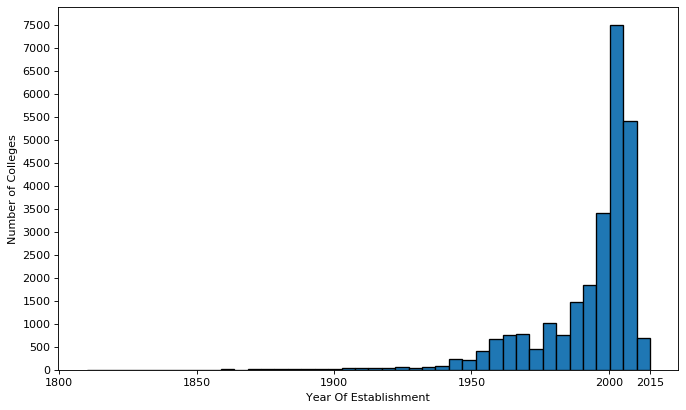

In [74]:
# plotting the graph for Number of colleges on y axis and year of establishment on x axis
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure
%matplotlib inline
# plt.xticks(bins)
figure(num=None, figsize=(10,6), dpi=80, facecolor='w', edgecolor='k')
plt.xlabel("Year Of Establishment")
plt.ylabel("Number of Colleges")
plt.yticks(y_axis)
x_axis=[1800,1850,1900,1950,2000,2015]
plt.xticks(x_axis)
plt.hist(x=bins,bins=42,weights=freq_year,edgecolor='black', linewidth=1.2)
save_results_to="../plots/"
plt.savefig(save_results_to + "YearofEst_no_of_colleges.png", dpi = 300)

In [75]:
df4.columns

Index(['college_institution', 'state', 'city', 'website', 'construct_in_sqmt',
       'year_of_establishment', 'type', 'autonomous', 'has_diploma_courses',
       'management', 'specialized', 'girl_exclusive',
       'staff_quarter_available', 'accomodation_available',
       'student_hostel_available', 'programme', 'discipline',
       'discipline_group_category', 'intake', 'admission_criterion',
       'Total Faculties', 'Faculty Student Ratio', 'Total Students',
       'playground', 'auditorium', 'theatre', 'library', 'laboratory',
       'conference_hall', 'health_center', 'gymnasium_fitness_center',
       'indoor_stadium', 'common_room', 'computer_center', 'cafeteria',
       'guest_house', 'is_accredited'],
      dtype='object')

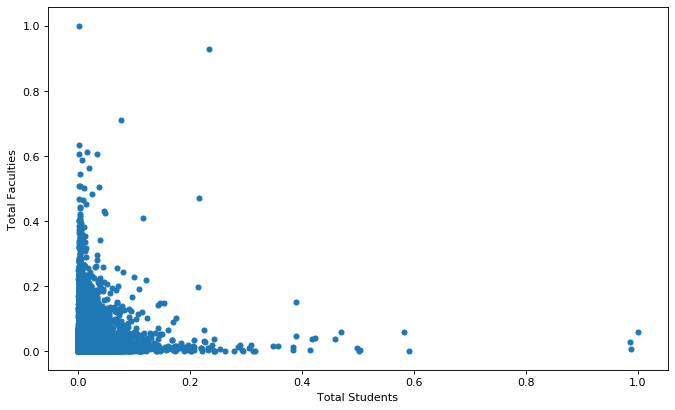

In [76]:
# plotting a scatter plot for Total faculties on y axis and Total students on x axis
figure(num=None, figsize=(10, 6), dpi=80, facecolor='w', edgecolor='k')
plt.xlabel("Total Students")
plt.ylabel("Total Faculties")
plt.scatter(df4["Total Faculties"],df4["Total Students"],s=20)
# figure(num=None, figsize=(8, 6), dpi=80, facecolor='w', edgecolor='k')
save_results_to="../plots/"
plt.savefig(save_results_to + "Facult_Student_ratio.png", dpi = 300)

In [77]:
df4["state"].unique()

array(['Gujarat', 'Maharashtra', 'Karnataka', 'Haryana', 'Punjab',
       'Uttar Pradesh', 'West Bengal', 'Telangana', 'Madhya Pradesh',
       'Odisha', 'Kerala', 'Himachal Pradesh', 'Tamil Nadu', 'Rajasthan',
       'Assam', 'Chhatisgarh', 'Andhra Pradesh', 'Puducherry',
       'Uttrakhand', 'Jammu and Kashmir', 'Daman & Diu', 'Tripura',
       'Jharkhand', 'Mizoram', 'Meghalaya', 'Manipur', 'Bihar', 'Delhi',
       'Dadra & Nagar Haveli', 'Chandigarh', 'Nagaland', 'Goa',
       'Arunachal Pradesh', 'Sikkim', 'Lakshadweep',
       'Andaman & Nicobar Islands'], dtype=object)

In [78]:
# creating a dictionary for total area of colleges in a particular state
state_areas={}
for i in range(len(df4['state'])):
    state_areas[df4['state'][i]]=0
for i in range(len(df4)):
    state_areas[df4['state'][i]]+=float(df4['construct_in_sqmt'][i])

    

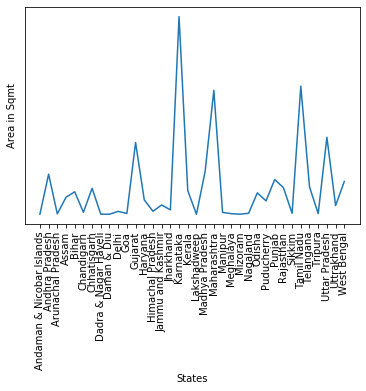

In [79]:
# plotting a graph for total area of colleges in a particular state
#figure(num=None, figsize=(10, 8), dpi=80, facecolor='w', edgecolor='k')
lists = sorted(state_areas.items()) # sorted by key, return a list of tuples
x, y = zip(*lists) # unpack a list of pairs into two tuples

fig, ax = plt.subplots()

labels = [item.get_text() for item in ax.get_yticklabels()]

empty_string_labels = ['']*len(labels)
ax.set_yticklabels(empty_string_labels)
ax.tick_params(axis="y",length=0)
plt.plot(x, y)
locs, labels = plt.xticks()
plt.setp(labels, rotation=90)
#plt.gca().axes.get_yaxis().set_visible(False)
plt.ylabel("Area in Sqmt")
plt.xlabel("States")
save_results_to="../plots/"
plt.savefig(save_results_to + "State_ConstructArea.png", dpi = 300,bbox_inches = "tight")

In [80]:
df4.shape

(26122, 37)

In [81]:
df5 = df4

In [82]:
df5.shape

(26122, 37)

In [83]:
print(df5.iloc[0])

college_institution          SHRI D.V.RAVAL ARTS & COMM. COLLEGE-HALVAD
state                                                           Gujarat
city                                                             HALVAD
website                                                              --
construct_in_sqmt                                           5.00005e-05
year_of_establishment                                                35
type                                                 Affiliated College
autonomous                                                        False
has_diploma_courses                                               False
management                                                Private Aided
specialized                                                        True
girl_exclusive                                                    False
staff_quarter_available                                           False
accomodation_available                                          

In [84]:
df5.drop(columns=['college_institution','city','website','year_of_establishment','type','specialized'],inplace=True)
df5.drop(columns=['staff_quarter_available','programme','discipline_group_category'],inplace=True)
df5.head()

,state,construct_in_sqmt,autonomous,has_diploma_courses,management,girl_exclusive,accomodation_available,student_hostel_available,discipline,intake,...,laboratory,conference_hall,health_center,gymnasium_fitness_center,indoor_stadium,common_room,computer_center,cafeteria,guest_house,is_accredited
0,Gujarat,5.00005e-05,False,False,Private Aided,False,False,False,Commerce,0.0293333,...,FALSE,FALSE,FALSE,FALSE,FALSE,TRUE,TRUE,FALSE,FALSE,TRUE
1,Gujarat,0.000299807,False,False,Private Aided,False,True,True,Commerce,0.008,...,FALSE,TRUE,FALSE,TRUE,FALSE,TRUE,TRUE,TRUE,FALSE,TRUE
2,Maharashtra,0.00209002,False,False,Private Un-Aided,False,False,False,commerce,0.008,...,FALSE,TRUE,TRUE,TRUE,TRUE,TRUE,TRUE,TRUE,FALSE,FALSE
3,Gujarat,0.000337503,False,False,Private Un-Aided,False,True,True,COMPUTER SCIENCE,0.004,...,FALSE,TRUE,FALSE,FALSE,FALSE,TRUE,TRUE,FALSE,FALSE,FALSE
4,Gujarat,0.000353893,False,False,State Government,False,False,False,Arts,0.03,...,FALSE,FALSE,FALSE,FALSE,FALSE,TRUE,FALSE,FALSE,FALSE,FALSE


In [85]:
df5.head(9121)

,state,construct_in_sqmt,autonomous,has_diploma_courses,management,girl_exclusive,accomodation_available,student_hostel_available,discipline,intake,...,laboratory,conference_hall,health_center,gymnasium_fitness_center,indoor_stadium,common_room,computer_center,cafeteria,guest_house,is_accredited
0,Gujarat,5.00005e-05,False,False,Private Aided,False,False,False,Commerce,0.0293333,...,FALSE,FALSE,FALSE,FALSE,FALSE,TRUE,TRUE,FALSE,FALSE,TRUE
1,Gujarat,0.000299807,False,False,Private Aided,False,True,True,Commerce,0.008,...,FALSE,TRUE,FALSE,TRUE,FALSE,TRUE,TRUE,TRUE,FALSE,TRUE
2,Maharashtra,0.00209002,False,False,Private Un-Aided,False,False,False,commerce,0.008,...,FALSE,TRUE,TRUE,TRUE,TRUE,TRUE,TRUE,TRUE,FALSE,FALSE
3,Gujarat,0.000337503,False,False,Private Un-Aided,False,True,True,COMPUTER SCIENCE,0.004,...,FALSE,TRUE,FALSE,FALSE,FALSE,TRUE,TRUE,FALSE,FALSE,FALSE
4,Gujarat,0.000353893,False,False,State Government,False,False,False,Arts,0.03,...,FALSE,FALSE,FALSE,FALSE,FALSE,TRUE,FALSE,FALSE,FALSE,FALSE
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9116,Odisha,3.50004e-05,False,False,Private Un-Aided,False,False,False,SCIENCE,0.00853333,...,TRUE,TRUE,FALSE,FALSE,FALSE,TRUE,TRUE,FALSE,TRUE,FALSE
9117,Himachal Pradesh,0.000353893,False,False,State Government,False,True,True,M.A. English,0.0036,...,TRUE,TRUE,TRUE,TRUE,TRUE,TRUE,TRUE,TRUE,FALSE,TRUE
9118,Rajasthan,0.00431004,False,False,Private Un-Aided,True,False,False,"art,science,commers",0.000133333,...,TRUE,TRUE,TRUE,FALSE,FALSE,TRUE,TRUE,TRUE,FALSE,FALSE
9119,Odisha,9.5853e-05,False,False,Private Un-Aided,False,False,False,#NAME?,#NAME?,...,#NAME?,#NAME?,#NAME?,#NAME?,#NAME?,#NAME?,#NAME?,#NAME?,#NAME?,#NAME?


In [86]:
df5.shape
df5.columns
df5.drop(columns=['admission_criterion'],inplace = True)
df5.head()

,state,construct_in_sqmt,autonomous,has_diploma_courses,management,girl_exclusive,accomodation_available,student_hostel_available,discipline,intake,...,laboratory,conference_hall,health_center,gymnasium_fitness_center,indoor_stadium,common_room,computer_center,cafeteria,guest_house,is_accredited
0,Gujarat,5.00005e-05,False,False,Private Aided,False,False,False,Commerce,0.0293333,...,FALSE,FALSE,FALSE,FALSE,FALSE,TRUE,TRUE,FALSE,FALSE,TRUE
1,Gujarat,0.000299807,False,False,Private Aided,False,True,True,Commerce,0.008,...,FALSE,TRUE,FALSE,TRUE,FALSE,TRUE,TRUE,TRUE,FALSE,TRUE
2,Maharashtra,0.00209002,False,False,Private Un-Aided,False,False,False,commerce,0.008,...,FALSE,TRUE,TRUE,TRUE,TRUE,TRUE,TRUE,TRUE,FALSE,FALSE
3,Gujarat,0.000337503,False,False,Private Un-Aided,False,True,True,COMPUTER SCIENCE,0.004,...,FALSE,TRUE,FALSE,FALSE,FALSE,TRUE,TRUE,FALSE,FALSE,FALSE
4,Gujarat,0.000353893,False,False,State Government,False,False,False,Arts,0.03,...,FALSE,FALSE,FALSE,FALSE,FALSE,TRUE,FALSE,FALSE,FALSE,FALSE


In [87]:
df5.iloc[0]

state                                   Gujarat
construct_in_sqmt                   5.00005e-05
autonomous                                False
has_diploma_courses                       False
management                        Private Aided
girl_exclusive                            False
accomodation_available                    False
student_hostel_available                  False
discipline                             Commerce
intake                                0.0293333
Total Faculties                       0.0217186
Faculty Student Ratio       0.04918032786885246
Total Students                        0.0537468
playground                                FALSE
auditorium                                 TRUE
theatre                                    TRUE
library                                    TRUE
laboratory                                FALSE
conference_hall                           FALSE
health_center                             FALSE
gymnasium_fitness_center                

In [88]:
cols = df5.columns
transactions=[]
k=0
for i in range(10000):
    lst=[]
    for j in range(27):
        
        temp=cols[j]+"="
        if(j==1):
            if(i>0 and str(df5.iloc[i][j]).find("#NA")!=-1):
                temp=transactions[0][j]
                continue
            if(float(df5.iloc[i][j])<0.00003):
                temp+="low"
            elif(float(df5.iloc[i][j])>=0.00003 and float(df5.iloc[i][j])<0.0003):
                temp+="average"
            elif(float(df5.iloc[i][j])>=0.0003 and float(df5.iloc[i][j])<0.003):
                temp+="above_average"
            else:
                temp+="high"
        elif(j==9 or j==10 or j==11 or j==12):
            if(i>0 and str(df5.iloc[i][j]).find("#NA")!=-1):
                temp=transactions[0][j]
                continue
            try:
                if(float(df5.iloc[i][j])<0.005):
                    temp+="low"
                elif(float(df5.iloc[i][j])>=0.005 and float(df5.iloc[i][j])<0.02):
                    temp+="average"
                elif(float(df5.iloc[i][j])>=0.02 and float(df5.iloc[i][j])<0.1):
                    temp+="above_average"
                else:
                    temp+="high"
            except:
                print(df5.iloc[i][j])
            
        else:
            #print(i," ",j)
            if(i>0 and str(df5.iloc[i][j]).find("#NA")!=-1):
                temp=transactions[0][j]
            elif(len(str(df5.iloc[i][j]))==2 and str(df5.iloc[i][j])[0]=='N' and str(df5.iloc[i][j])[1]=='A'):
                temp=transactions[0][j]
            else:
                temp+=str(df5.iloc[i][j])
        lst.append(temp)
    transactions.append(lst)
print(transactions[0])

['state=Gujarat', 'construct_in_sqmt=average', 'autonomous=False', 'has_diploma_courses=False', 'management=Private Aided', 'girl_exclusive=False', 'accomodation_available=False', 'student_hostel_available=False', 'discipline=Commerce', 'intake=above_average', 'Total Faculties=above_average', 'Faculty Student Ratio=above_average', 'Total Students=above_average', 'playground=FALSE', 'auditorium=TRUE', 'theatre=TRUE', 'library=TRUE', 'laboratory=FALSE', 'conference_hall=FALSE', 'health_center=FALSE', 'gymnasium_fitness_center=FALSE', 'indoor_stadium=FALSE', 'common_room=TRUE', 'computer_center=TRUE', 'cafeteria=FALSE', 'guest_house=FALSE', 'is_accredited=TRUE']


In [89]:
#importing every possible thing we need
import sys
import csv
from itertools import combinations_with_replacement
from itertools import chain
from optparse import OptionParser
from optparse import OptionContainer
from collections import defaultdict
from collections import deque
from itertools import combinations
import matplotlib.pyplot as plt

# open file in csv format
def generateOneFrequentItemsets(filename):
    ItemSets=set()
    TotalTransactions=list()
    for row in filename:
        transaction=frozenset(row)
        TotalTransactions.append(transaction)
        #store 1 itemset in the following itemset if run for first time:
        for item in row:
            ItemSets.add(frozenset([item]))
    return TotalTransactions,ItemSets
#this function is being used for printing the items, while debugging
def printFrequentItemset(Itemset):
    print(Itemset)
    print(len(Itemset))
    return 0
#we create k+1 itemset from k itemset
def combineItemSetsToGenerateNextItemSets(ItemSet,length):
    NextItemSet=set()
    for item in ItemSet:
        for i in ItemSet:
            if(len(item.union(i))==length):
                NextItemSet.add(item.union(i))
    return NextItemSet
#we reduce the items from the set which do not qualify the min support criteria
def reductionOfItemset(ItemSet,transactions,minsup,frequentFinalSet):
    reducedSet=set()
    countOccurences=defaultdict(int)
    for item in ItemSet:
        for t in transactions:
            if(item.issubset(t)==True):
                frequentFinalSet[item]=frequentFinalSet[item]+1
                countOccurences[item]=countOccurences[item]+1
    lengthOfTransactionBasket=float(len(transactions))
    for i,c in countOccurences.items():
        sup=float(c)/lengthOfTransactionBasket
        if(sup>=minsup):
            reducedSet.add(i)
    #print(reducedSet)
    return reducedSet

def subsetGeneration(ItemSet):
    NonEmptyPowerSet=list()
    for number,item in enumerate(ItemSet):
        for i in combinations(ItemSet,number+1):
            NonEmptyPowerSet.append(i)
    return NonEmptyPowerSet
#iterate on database to get support 
def supportCalculator(item,FrequentSet,BigBasket):
    LengthofBigBasket=float(len(BigBasket))
    sup=float(FrequentSet[item])/LengthofBigBasket
    return sup

#Our final print function
def printingLists(items,rules):
    for item,support in items:
        print("item: "+str(item)+" ("+str(support)+") ")
    for pre,post,conf in rules:
        print(str(pre)+"--->"+str(post)+" ("+str(conf)+") ")

#The function which controls the flow of the algorithm, pseudo code taken from "Introduction to data mining textbook" 

def AprioriAlgorithm(file,minsup,minconf):
    BigBasket,Itemset=generateOneFrequentItemsets(file)
    #item greater than minsup
    AllSets=dict()
    k=2
    #reduction of candidate generation
    frequentSet=defaultdict(int)
    #rule storing
    Rules=dict()
    firstFrequentSet=reductionOfItemset(Itemset,BigBasket,minsup,frequentSet)
    Nextlength=2
    NextFrequentSets=firstFrequentSet
    NullSet=set([])
    while(NextFrequentSets!=NullSet):
        AllSets[k-1]=NextFrequentSets
        NextFrequentSets=combineItemSetsToGenerateNextItemSets(NextFrequentSets,Nextlength)
        localSet=reductionOfItemset(NextFrequentSets,BigBasket,minsup,frequentSet)
        NextFrequentSets=localSet
        Nextlength=Nextlength+1
        k+=1
    CreatingListOfItems=[]
    #print(AllSets)
    for value in AllSets.values():
        for i in value:
            CreatingListOfItems.append((tuple(i),supportCalculator(i,frequentSet,BigBasket)))
    newSet=AllSets.items()
    CreatingListOfRules=[]
    tempNULLSet=set([])
    for key,value in newSet:
        for item in value:
            subset=map(frozenset,[new for new in subsetGeneration(item)])
            for x in subset:
                x_y=item.difference(value)
                lengthX_Y=len(x_y)
                if(lengthX_Y>0):
                    conf=supportCalculator(item,frequentSet,BigBasket)/supportCalculator(x,frequentSet,BigBasket)
                    final_item_ans = item-x
                    if(conf>=minconf and conf<1 and final_item_ans!=tempNULLSet and x!=tempNULLSet):
                        CreatingListOfRules.append((tuple(final_item_ans),tuple(x),conf))
    return CreatingListOfItems,CreatingListOfRules
if __name__=="__main__":
    items,rules=AprioriAlgorithm(transactions,0.8,0.90)
    printingLists(items,rules)

item: ('has_diploma_courses=False',) (0.9807) 
item: ('autonomous=False',) (0.8888) 
item: ('playground=TRUE',) (0.8929) 
item: ('common_room=TRUE',) (0.8711) 
item: ('library=TRUE',) (0.9678) 
item: ('computer_center=TRUE',) (0.826) 
item: ('girl_exclusive=False',) (0.8877) 
item: ('theatre=FALSE',) (0.8595) 
item: ('girl_exclusive=False', 'library=TRUE') (0.8589) 
item: ('computer_center=TRUE', 'library=TRUE') (0.8208) 
item: ('autonomous=False', 'has_diploma_courses=False') (0.8716) 
item: ('library=TRUE', 'common_room=TRUE') (0.8641) 
item: ('common_room=TRUE', 'playground=TRUE') (0.8085) 
item: ('theatre=FALSE', 'has_diploma_courses=False') (0.8433) 
item: ('library=TRUE', 'playground=TRUE') (0.8836) 
item: ('autonomous=False', 'library=TRUE') (0.8597) 
item: ('computer_center=TRUE', 'has_diploma_courses=False') (0.8099) 
item: ('has_diploma_courses=False', 'playground=TRUE') (0.8776) 
item: ('library=TRUE', 'has_diploma_courses=False') (0.9498) 
item: ('girl_exclusive=False', 'ha

In [90]:
print("Apriori End")

Apriori End


In [91]:
arr=["construct_in_sqmt","year_of_establishment","Total Faculties","Total Students","intake"]

In [92]:
for i in range(len(df4)):
    if(df4['intake'][i]=="#NAME?"):
        df4=df4.drop(index=i,axis=0)

In [93]:
'''
for i in range(len(arr)-1):
    for j in range(i+1,len(arr)):
        figure(num=None, figsize=(20, 15), dpi=50, facecolor='w', edgecolor='k')
        plt.xlabel(arr[i])
        plt.ylabel(arr[j])
        plt.scatter(df4[arr[i]],df4[arr[j]])
        plt.show()
        print()
'''  

"\nfor i in range(len(arr)-1):\n    for j in range(i+1,len(arr)):\n        figure(num=None, figsize=(20, 15), dpi=50, facecolor='w', edgecolor='k')\n        plt.xlabel(arr[i])\n        plt.ylabel(arr[j])\n        plt.scatter(df4[arr[i]],df4[arr[j]])\n        plt.show()\n        print()\n"

In [94]:
import pickle
f=open("df4new.pkl","rb")
df4=pickle.load(f)
f.close()

In [95]:
df4=df4.reset_index()

In [96]:
from random import randint

In [97]:
c=0
len1=0
for i in df4['programme'].unique():
    df1=df4[df4['programme']==i]
    if(len(df1)>20):
        c+=1
        len1+=len(df1)
    print(i," ",len(df1))


print(c)
print(len1)

B.Com.-Bachelor of Commerce   2576
M.Com.-Master of Commerce   305
B.C.A.-Bachelor of Computer Applications   704
B.A.-Bachelor of Arts   4232
B.Sc.-Bachelor of Science   2676
M.C.A. -Master of Computer Applications   225
B.Ed.-Bachelor of Education   3457
M.A.-Master of Arts   765
M.Pharm. -Master of Pharmacy   257
B.H.M.S.-Bachelor of Homeopathic Medicine and Surgery   84
Diploma-Diploma   581
B.S.W.-Bachelor of Social Work   62
L.L.B.-Bachelor of Law or Laws   378
M.S.W.-Master of Social Work   92
M.Sc.-Master of Science   614
Parangat-Parangat   4
B.Tech.-Bachelor of Technology   850
M.Ed. -Master of Education   231
PG Diploma-Post Graduate Diploma   323
B.Pharm.-Bachelor of Pharmacy   278
B.P.T.-Bachelor of Physiotherapy   103
M.H.A. -Master of Hospital Administration   7
B.Architecture-Bachelor of Architecture   150
B.Des.-Bachelor of Design   13
B.H.M.C.T.-Bachelor of Hotel Management and Catering Technology   46
M.B.A.- Master of Business Administration   932
B.E.-Bachelor of E

In [98]:
#finding distance between two data points of a dataframe
#making lists for different types of column
col=[]
col_float=[]
col_bool=[]
col_str=[]
def dist1(i,j,df):
    d=0
    for k in df.columns:
        if(type(df[k][i])==float and type(df[k][j])==float):
            d+=(df[k][i]-df[k][j])**2
            col.append(k)
            col_float.append(k)
        if(type(df[k][i])==np.bool_):
            col.append(k)
            col_bool.append(k)
            if(df[k][i]==True):
                if(df[k][j]==False):
                    d+=1
            if(df[k][i]==False):
                if(df[k][j]==True):
                    d+=1
        if(type(df[k][i])==str):
            if(df[k][i]=='TRUE' or df[k][i]=='True'):
                col.append(k)
                col_str.append(k)
                if(df[k][j]=='FALSE' or df[k][j]=='False'):
                    d+=1
            if(df[k][i]=='FALSE' or df[k][i]=='False'):
                col.append(k)
                col_str.append(k)
                if(df[k][j]=='TRUE' or df[k][j]=='True'):
                    d+=1
    return d**0.5
dist1(0,1,df4)

4.795967902875487

In [99]:
#finding distance between two data points of a dataframe
def dist(i,j,df):
    d=0
    for k in col_float:
        d+=(df[k][i]-df[k][j])**2
             
    for k in col_bool:
        if(df[k][i]==True):
            if(df[k][j]==False):
                d+=1
        if(df[k][i]==False):
            if(df[k][j]==True):
                d+=1
    for k in col_str:
        if(df[k][i]=='TRUE' or df[k][i]=='True'):  
            if(df[k][j]=='FALSE' or df[k][j]=='False'):
                d+=1
        if(df[k][i]=='FALSE' or df[k][i]=='False'):  
            if(df[k][j]=='TRUE' or df[k][j]=='True'):
                d+=1
    return d**0.5

In [100]:
# function to find distance from centroid taking parameters as an index in dataframe and a dictionary of cluster
def dist_from_centroid(i,dictt,df):
    d=0
    
    if(i not in df.index.values):
            print("i missing in dictt ",i)
            print(df["index"])

    for k in col_float:
        if(k not in dictt.keys()):
            print("K missing in dictt ",k)
##            print(dictt.keys())
            continue
        d+=(df[k][i]-dictt[k])**2
             
    for k in col_bool:
        if(k not in dictt.keys()):
            print("K missing in dictt ",k)
##            print(dictt.keys())
            continue
        if(df[k][i]==True):
            if(dictt[k]==False):
                d+=1
        if(df[k][i]==False):
            if(dictt[k]==True):
                    d+=1
    for k in col_str:
        if(k not in dictt.keys()):
            print("K missing in dictt ",k)
##            print(dictt.keys())
            continue
        if(df[k][i]=='TRUE' or df[k][i]=='True'):  
            if(dictt[k]=='FALSE' or dictt[k]=='False'):
                d+=1
        if(df[k][i]=='FALSE' or df[k][i]=='False'):  
            if(dictt[k]=='TRUE' or dictt[k]=='True'):
                    d+=1
    return d**0.5

In [101]:
# function to run part of kmeans i.e finding new cluster for each iteration
def calculate_new_centroids(df,clusters):
    new_centroids=[]
    for i in range(len(clusters)):
        new_centroids.append(dict())
       
    for i in range(len(clusters)):
        for k in col_float:
            d=0
            for j in range(len(clusters[i])):
                d+=df[k][clusters[i][j]]
            if(len(clusters[i])!=0):
                d/=len(clusters[i])
            new_centroids[i][k]=d
        for k in col_bool:
            cntTrue=0
            cntFalse=0
            for j in range(len(clusters[i])):
                if df[k][j]==True:
                    cntTrue+=1
                else:
                    cntFalse+=1
            if cntTrue>=cntFalse:
                new_centroids[i][k]=True
            else:
                new_centroids[i][k]=False
        for k in col_str:
            cntTrue=0
            cntFalse=0
            for j in range(len(clusters[i])):
                if df[k][j]=="True" or df[k][j]=="TRUE":
                    cntTrue+=1
                else:
                    cntFalse+=1
            if cntTrue>=cntFalse:
                new_centroids[i][k]="True"
            else:
                new_centroids[i][k]="False"
    return new_centroids

In [102]:
# function which runs kmeans algorithm which takes as a parameter dataframe which needs to be grouped and intial number of clusters
def kmeans(df,k):
    print("Starting K Means ....")
    init=[]
    centroids=[]
    while len(init)<k:
        r=randint(0,len(df))
        if r not in init:
            init.append(r)
    for index in init:
        temp=dict()
        for name in col:
            temp[name]=df[name][index]
        centroids.append(temp)        
    clusters=[]
    for i in range(k):
        clusters.append(list())
    for i in range(len(df)):
        if (i%2500==0):
            print("Iteration: ",i)
        min_dist=100000
        min_j=-1
        for j in range(len(centroids)):
            distance=dist_from_centroid(i,centroids[j],df)
            if distance<min_dist:
                min_dist=distance
                min_j=j
        clusters[min_j].append(i)
    new_clusters=[]
    for i in range(k):
        new_clusters.append(list())
    iterations=0
    print(clusters)
    new_centroids=[]
    while new_clusters!=clusters and iterations<5:
        print("Starting Calcultaion of New Centroids: ")
        new_centroids=calculate_new_centroids(df,clusters)
        clusters=new_clusters
        new_clusters=[]
        for i in range(k):
            new_clusters.append(list())
        for i in range(len(df)):
            if i%2500==0:
                print("Iteration: ",i)
            min_dist=100000
            min_j=-1
            for j in range(len(new_centroids)):
                distance=dist_from_centroid(i,new_centroids[j],df)
                if distance<min_dist:
                    min_dist=distance
                    min_j=j
            new_clusters[min_j].append(i)
        iterations+=1
    print(new_clusters)
    return [new_clusters,new_centroids]

In [103]:
# this function returns a distance matrix which represents distance between each point in a datafrane with other
def dist_matrix(df,df1sample):
    matrix=np.zeros((len(df),len(df)))
    #start = timer()
    b=df1sample.index.values.tolist()
    print(b)
    for i in range(len(b)):
        if(b[i]>len(df)):
            print("Donkey i ",b[i])
            break
        for j in range(len(b)):
            if(b[j]>len(df)):
                print("Don j ",b[j])
                break
            matrix[b[i]][b[j]]=dist(b[i],b[j],df)

        if(i%10==0):
            print(i)
           # end= timer()
           # print(end-start)
    #print(end-start)
    return matrix

In [104]:
# This function is used to find the silhoutte coefficient for ith object in a cluster
def silhoutte_sample(clusters,dist,k,c,centroids,df):
    minn=9999999
    b=df.index.values
    nearest_cluster=-1
    print("Silhouette of Sample point ",k," in cluster no. ",c)
    for i in range(len(clusters)):
        if(i!=c):
            for j in range(len(clusters[i])):
                if clusters[i][j] in b:
                    t=dist[k][clusters[i][j]]
                    if(minn<t):
                        minn=t
                        nearest_cluster=i
    ai=0
    bi=0
    alen=0
    blen=0
    for i in clusters[c]:
        if(i!=k) and i in b:
            ai+=dist[k][i]
            alen+=1
    if(alen>0):
        ai/=alen
    
    for i in clusters[nearest_cluster]:
        if i in b:
            bi+=dist[k][i]
            blen+=1
    if (len(clusters[nearest_cluster])>0):
        bi/=blen
    
     
    if ai>=bi and ai!=0: 
        return (bi-ai)/ai
    elif bi!=0: 
        return (bi-ai)/bi
    else:
        return 0
    
# this function is used to find the overall silhouutte value    
def silhoutte(clusters,dist,centroids,df):
    s=0
    nos=0
    b=df.index.values.tolist()
    for i in range(len(clusters)):
        for j in range(len(clusters[i])):
            if(clusters[i][j] in b):
                s+=silhoutte_sample(clusters,dist,clusters[i][j],i,centroids,df)
                nos+=1
    return s/nos

In [105]:
from timeit import default_timer as timer

In [106]:
#This function runs the Kmeans and store the optimal number of K for each programme(courses like B.Ed,B.Tech,etc) in a text file. This part is already preprocessed to make the implementation of the complete code faster
'''
# Running Kmeans and storing Optimal Ks in a text file 
c=0
len1=0
lst={}
start=timer()
counter=0
for i in df4['programme'].unique():
    counter+=1
    try:
        print(i)
        df1=df4[df4['programme']==i]
        df1=df1.reset_index()
        del df1['index']
        if(len(df1)>20):
            for k in range(2,11):
                lst[k]=kmeans(df1,k)
            c+=1
            len1+=len(df1)
            if(len(df1)<400):
                dist_m=dist_matrix(df1,df1)
                for k in range(2,11):
                    sc=silhoutte(lst[k][0],dist_m,lst[k][1],df1)
                    lst[k].append(sc)
            else:
                df1sample=df1.sample(frac=0.1, replace=False, random_state=1)
                dist_m=dist_matrix(df1,df1sample)
                print(dist_m)
                for k in range(2,11):
                    sc=silhoutte(lst[k][0],dist_m,lst[k][1],df1sample)
                    lst[k].append(sc)
            maxs=0
            maxk=0
            print("Printing silhoutte")
            for k in range(2,11):
                if(lst[k][2]>maxs):
                    maxs=lst[k][2]
                    maxk=k
            print(maxs)
            print(maxk)
            f=open("OptimalKsfinal.txt","a")
            sss=str(counter)+" "+str(maxk)
            f.write(sss)
            f.write('\n')
            f.close()
    except:
        pass
    
end=timer()
print("Time: ",end-start)
'''

'\n# Running Kmeans and storing Optimal Ks in a text file \nc=0\nlen1=0\nlst={}\nstart=timer()\ncounter=0\nfor i in df4[\'programme\'].unique():\n    counter+=1\n    try:\n        print(i)\n        df1=df4[df4[\'programme\']==i]\n        df1=df1.reset_index()\n        del df1[\'index\']\n        if(len(df1)>20):\n            for k in range(2,11):\n                lst[k]=kmeans(df1,k)\n            c+=1\n            len1+=len(df1)\n            if(len(df1)<400):\n                dist_m=dist_matrix(df1,df1)\n                for k in range(2,11):\n                    sc=silhoutte(lst[k][0],dist_m,lst[k][1],df1)\n                    lst[k].append(sc)\n            else:\n                df1sample=df1.sample(frac=0.1, replace=False, random_state=1)\n                dist_m=dist_matrix(df1,df1sample)\n                print(dist_m)\n                for k in range(2,11):\n                    sc=silhoutte(lst[k][0],dist_m,lst[k][1],df1sample)\n                    lst[k].append(sc)\n            maxs

In [107]:
# creating a dictionary- programme offered as keys and optimal Value of K as values
programmes_offered={}
f=open("OptimalKsfinal.txt","r")
data=f.readlines()
for i in range(len(data)):
    data[i]=list(map(int,data[i].strip().split()))
for i in range(len(data)):
    programmes_offered[df4['programme'].unique()[data[i][0]-1]]=data[i][1]
print(len(programmes_offered))

34


In [108]:
print("float")
for i in col_float:
    print(i)
print("bool")
for i in col_bool:
    print(i)
print("str")
for i in col_str:
    print(i)

float
construct_in_sqmt
year_of_establishment
intake
Total Faculties
Total Students
bool
autonomous
has_diploma_courses
specialized
girl_exclusive
staff_quarter_available
accomodation_available
student_hostel_available
str
playground
auditorium
theatre
library
laboratory
conference_hall
health_center
gymnasium_fitness_center
indoor_stadium
common_room
computer_center
cafeteria
guest_house
is_accredited


In [109]:
df4['programme'].unique()

array(['B.Com.-Bachelor of Commerce', 'M.Com.-Master of Commerce',
       'B.C.A.-Bachelor of Computer Applications',
       'B.A.-Bachelor of Arts', 'B.Sc.-Bachelor of Science',
       'M.C.A. -Master of Computer Applications',
       'B.Ed.-Bachelor of Education', 'M.A.-Master of Arts',
       'M.Pharm. -Master of Pharmacy',
       'B.H.M.S.-Bachelor of Homeopathic Medicine and Surgery',
       'Diploma-Diploma', 'B.S.W.-Bachelor of Social Work',
       'L.L.B.-Bachelor of Law or Laws', 'M.S.W.-Master of Social Work',
       'M.Sc.-Master of Science', 'Parangat-Parangat',
       'B.Tech.-Bachelor of Technology', 'M.Ed. -Master of Education',
       'PG Diploma-Post Graduate Diploma',
       'B.Pharm.-Bachelor of Pharmacy',
       'B.P.T.-Bachelor of Physiotherapy',
       'M.H.A. -Master of Hospital Administration',
       'B.Architecture-Bachelor of Architecture',
       'B.Des.-Bachelor of Design',
       'B.H.M.C.T.-Bachelor of Hotel Management and Catering Technology',
       'M.

In [110]:
pr='B.Com.-Bachelor of Commerce'
#pr,range_construct_in_sqmt,range_year_of_establishment,range_intake,range_Total Faculties,range_Total Students,autonomous,has_diploma_courses,specialized,girl_exclusive,staff_quarter_available,accomodation_available,student_hostel_available,playground,auditorium,theatre,library,laboratory,conference_hall,health_center,gymnasium_fitness_center,indoor_stadium,common_room,computer_center,cafeteria,guest_house,is_accredited
#defining values for each field which user has given as input, if the values are not specified taking the mean value of that column in the data
def values(values_user):
    if(len(df4[df4['programme']==values_user['programme']])<=20):
        print("Not enough information available")
    else:
        df1=df4[df4['programme']==values_user['programme']]
        point={}
        for col in col_float:
            if col not in values_user.keys():
                point[col]=df1[col].mean()
        for col in col_bool:
            if col not in values_user.keys():
                if(len(df1[df1[col]==True])>len(df1[df1[col]==False])):
                    point[col]=True
                else:
                    point[col]=False
        for col in col_str:
            if col not in values_user.keys():
                if(len(df1[df1[col]==("True" or "TRUE")])>len(df1[df1[col]==("False" or "FALSE")])):
                    point[col]='True'
                else:
                    point[col]='False'
        for i in values_user.keys():
            if (isinstance(values_user[i],list)):
                point[i]=(values_user[i][0]+values_user[i][1])/2
            else:
                point[i]=values_user[i]
    return point


In [111]:
# Running the code for taking user preference as input 
# Pyhon should be installed in the command promt and PyQt5 package should have been installed
# Check for the new window which will open
import os
print("Taking User Preferences")
os.system("python dm_project.py")
import pickle
f=open("UserPreferences.pkl","rb")
user_preferences=pickle.load(f)
f.close()
print(user_preferences)

Taking User Preferences
{'programme': 'B.Tech.-Bachelor of Technology', 'construct_in_sqmt': [8000, 10000], 'year_of_establishment': [1950, 2000], 'autonomous': False, 'has_diploma_courses': False, 'specialized': True, 'girl_exclusive': False, 'staff_quarter_available': True, 'accomodation_available': True, 'student_hostel_available': True, 'playground': 'True', 'auditorium': 'True', 'theatre': 'False', 'library': 'True', 'laboratory': 'True', 'conference_hall': 'True', 'health_center': 'True', 'gymnasium_fitness_center': 'True', 'indoor_stadium': 'True', 'common_room': 'True', 'computer_center': 'True', 'cafeteria': 'True', 'guest_house': 'False', 'is_accredited': 'False'}


In [112]:
#p={'programme':'B.Com.-Bachelor of Commerce','construct_in_sqmt':[2000,50000],'year_of_establishment':[1950,1980],'Total Students':[2000,4000],'autonomous':True,'has_diploma_courses':False,'girl_exclusive':False,'accomodation_available':True,'playground':'True'}
point=values(user_preferences)
if(point['year_of_establishment']>42):
    temp=float(point["year_of_establishment"])
    temp=int(temp)
    temp1=temp%5
    point["year_of_establishment"]=temp-temp1
    point["year_of_establishment"]-=1810
    point["year_of_establishment"]/=5
for i in point:
    if(i=='year_of_establishment' or i==''):
        continue
    if(type(point[i])==int or type(point[i])==float or type(point[i])==np.float64):
        if(point[i]>1):
            point[i]=(point[i]-min_col[i])/(max_col[i]-min_col[i])

In [113]:
print(programmes_offered)

{'B.Com.-Bachelor of Commerce': 10, 'M.Com.-Master of Commerce': 10, 'B.C.A.-Bachelor of Computer Applications': 7, 'M.C.A. -Master of Computer Applications': 5, 'M.A.-Master of Arts': 9, 'M.Pharm. -Master of Pharmacy': 8, 'B.H.M.S.-Bachelor of Homeopathic Medicine and Surgery': 4, 'B.S.W.-Bachelor of Social Work': 8, 'L.L.B.-Bachelor of Law or Laws': 9, 'M.Sc.-Master of Science': 10, 'B.Tech.-Bachelor of Technology': 7, 'M.Ed. -Master of Education': 7, 'PG Diploma-Post Graduate Diploma': 3, 'B.P.T.-Bachelor of Physiotherapy': 9, 'B.Architecture-Bachelor of Architecture': 4, 'M.B.A.- Master of Business Administration': 3, 'B.E.-Bachelor of Engineering': 5, 'M.E.-Master of Engineering': 9, 'M.Sc. Nursing-Master of Science in Nursing': 4, 'M.Tech. -Master of Technology': 2, 'B.Sc.(Nursing)-Bachelor of Science in Nursing': 6, 'B.Sc.(Post Basic)-B.Sc (Post Basic)': 6, 'Ph.D.-Doctor of Philosophy': 8, 'M.D.-Doctor of Medicine': 5, 'B.B.M.-Bachelor of Business Management': 9, 'B.A.(Hons)-Bac

In [114]:
def dist_between_centroids(c1,c2):
    d=0
    
    for k in col_float:
        d+=(c1[k]-c2[k])**2
             
    for k in col_bool:
        if(c1[k]==True):
            if(c2[k]==False):
                d+=1
        if(c1[k]==False):
            if(c2[k]==True):
                    d+=1
    for k in col_str:
        if(c1[k]=='TRUE' or c1[k]=='True'):  
            if(c2[k]=='FALSE' or c2[k]=='False'):
                d+=1
        if(c1[k]=='FALSE' or c1[k]=='False'):  
            if(c2[k]=='TRUE' or c2[k]=='True'):
                    d+=1
    return d**0.5

In [115]:
# The code specified here is used to predict the best college for user by narrowing down the search space
# running Kmeans for the program which user wants to study and introducing the user preference as a point after running clustering and check for the nearest cluster and nearest college within that cluster as specified by the user
df22=df4[df4['programme']==point['programme']]
del df22['index']
df22=df22.reset_index()
mnn=99999
mnnindex=-1
mn=99999
mnindex=-1
if point['programme'] in programmes_offered.keys():
    lst=kmeans(df22,programmes_offered[point['programme']])
    print(lst)


    for j in range(len(lst[1])):
        a=dist_between_centroids(lst[1][j],point)
        if(mn>a):
            mn=a
            mnindex=j

    for i in range(len(lst[0][mnindex])):
        a=dist_from_centroid(lst[0][mnindex][i],point,df22)
        if(mnn>a):
            mnn=a
            mnnindex=i
    
    print()
    print(mnnindex)
    print()
    print(df22['college_institution'][mnnindex])

Starting K Means ....
Iteration:  0
[[17, 242, 372, 404, 437, 438, 439, 471, 516, 544], [66, 75, 105, 112, 161, 208, 224, 264, 300, 312, 325, 327, 329, 349, 350, 365, 413, 457, 474, 476, 478, 504, 509, 521, 541, 547, 557, 560, 569, 574, 598, 603, 612], [2, 3, 4, 7, 11, 12, 19, 22, 30, 41, 47, 48, 49, 51, 52, 62, 67, 69, 73, 82, 89, 91, 94, 100, 104, 107, 108, 109, 115, 116, 128, 137, 141, 144, 146, 148, 160, 163, 167, 171, 172, 175, 180, 183, 191, 192, 196, 197, 201, 209, 217, 222, 225, 226, 230, 246, 250, 253, 257, 265, 269, 275, 279, 280, 282, 284, 295, 296, 301, 304, 322, 330, 341, 366, 386, 397, 411, 433, 441, 467, 486, 495, 498, 522, 527, 538, 556, 583, 590, 616, 625, 629, 630, 650, 652, 656, 658, 664, 665, 677, 679, 682, 683, 684, 686, 688, 690, 692, 693, 699, 700, 702, 703, 706, 707, 714, 718, 723, 727, 728, 729, 730, 731, 743, 744, 745, 748, 750, 751, 755, 759, 761, 762, 763, 771, 774, 775, 779, 781, 788, 790, 796, 800, 804, 809, 818, 822, 832, 833, 839, 841, 842, 843, 846, 847

In [116]:
print("The most appropriate college for you is ",(df22['college_institution'][mnnindex]))

The most appropriate college for you is  TECHNO INDIA AGARTALA


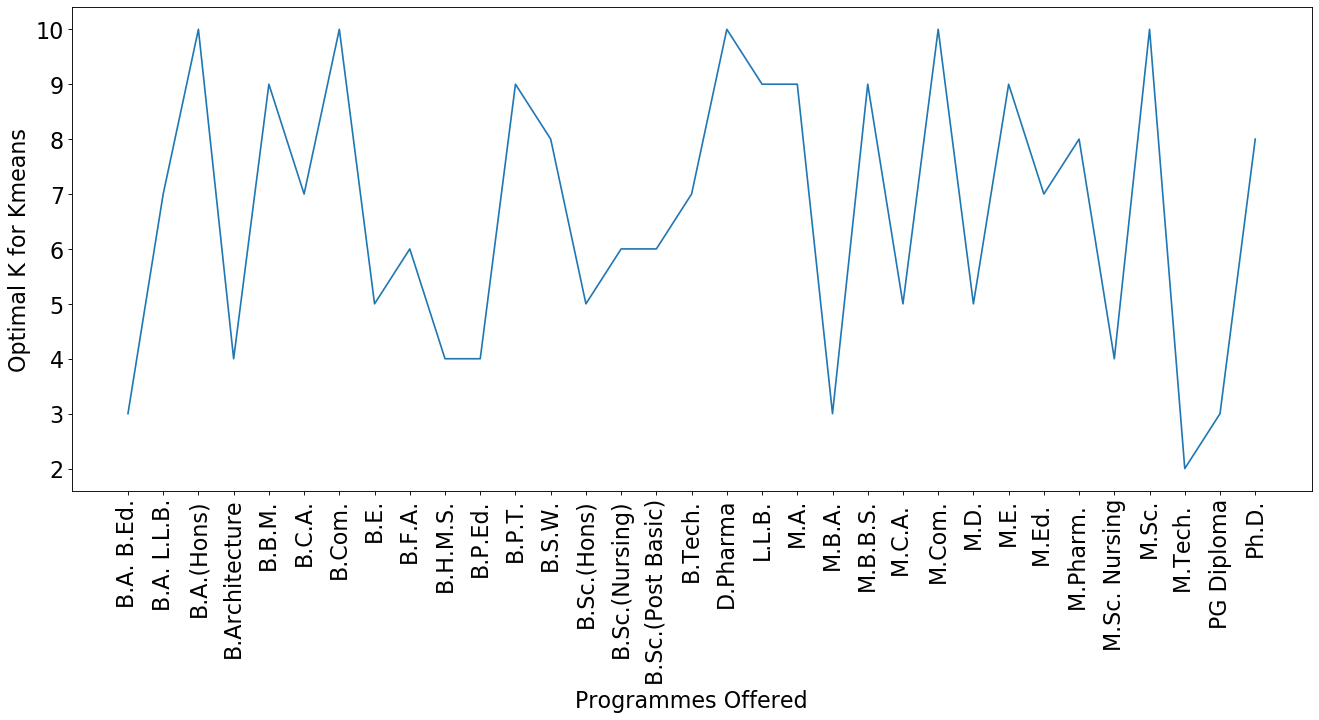

In [118]:
# plot between optimal Ks for Kmeans and the programme
from matplotlib import rc
figure(num=None, figsize=(20, 8), dpi=80, facecolor='w', edgecolor='k')
lists = sorted(programmes_offered.items()) # sorted by key, return a list of tuples
x, y = zip(*lists)
x1=[]
for i in range(len(x)-1):
    x1.append(x[i].split('-')[0])
y1=[]
for i in range(len(y)-1):
    y1.append(y[i])
plt.tight_layout()
plt.xlabel("Programmes Offered",fontsize=20)
plt.ylabel("Optimal K for Kmeans",fontsize=20)
rc('xtick',labelsize=20)
rc('ytick',labelsize=20)
plt.plot(x1, y1)
locs, labels = plt.xticks()
plt.setp(labels, rotation=90)
save_results_to="../plots/"
plt.savefig(save_results_to + "OptimalKs.png", dpi =300,bbox_inches = "tight")